In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [5]:
cats_df = pd.read_csv('data/cats.csv')
cats_df.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [6]:
mu = 2.6
ss.shapiro(cats_df['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [7]:
ss.wilcoxon(cats_df['Bwt'] - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [10]:
ss.ttest_1samp(cats_df['Bwt'], popmean=mu, alternative='two-sided')

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613)

In [12]:
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data_df = pd.DataFrame(data)
data_df.head()

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2


In [13]:
ss.ttest_rel(data_df['before'], data_df['after'], alternative='two-sided')

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528)

In [15]:
ss.shapiro(data_df['before']), ss.shapiro(data_df['after'])

(ShapiroResult(statistic=0.9644594192504883, pvalue=0.8352694511413574),
 ShapiroResult(statistic=0.9456835985183716, pvalue=0.6177982091903687))

In [16]:
female = cats_df.loc[cats_df['Sex'] == 'F', 'Bwt']
male = cats_df.loc[cats_df['Sex'] == 'M', 'Bwt']

In [17]:
ss.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [18]:
ss.ttest_ind(female, male, alternative='two-sided', equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

(47, 97)

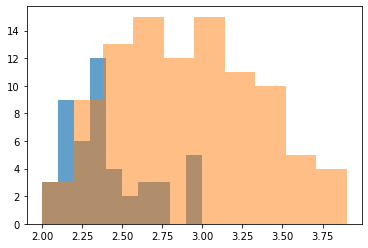

In [24]:
plt.hist(female, alpha=0.7)
plt.hist(male, alpha=0.5)
len(female), len(male)

In [29]:
iris_df = pd.read_csv('data/iris.csv')
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
iris_df['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
target_list = iris_df['target'].unique()
setosa = iris_df.loc[iris_df['target'] == 'Iris-setosa', 'sepal width']
versicolor = iris_df.loc[iris_df['target'] == 'Iris-versicolor', 'sepal width']
virginica = iris_df.loc[iris_df['target'] == 'Iris-virginica', 'sepal width']

<AxesSubplot:xlabel='target', ylabel='sepal width'>

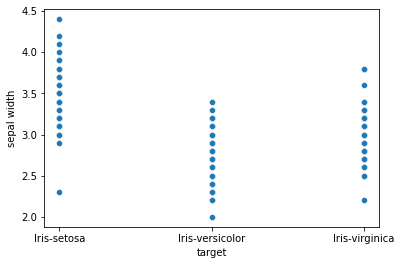

In [34]:
sns.scatterplot(data=iris_df, x='target', y='sepal width')

In [35]:
ss.shapiro(setosa), ss.shapiro(versicolor), ss.shapiro(virginica)

(ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427),
 ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507),
 ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896))

In [36]:
ss.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [38]:
ss.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

In [41]:
mc = MultiComparison(data=iris_df['sepal width'], groups=iris_df['target'])
mc.tukeyhsd(alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True
